In [132]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import time

df = pd.read_csv("Datasets/dataset_with_coords.csv")
lexicon = pd.read_csv("Datasets/lexicon.csv", header=None, squeeze=True)

pattern = '|'.join(lexicon)

In [133]:
new = df['cleaned'].str.contains(pattern)
df['people_needs'] = df['cleaned'].str.findall(pattern, flags=re.IGNORECASE).str.get(0)
categories = {
    'Food & Clothes':['relief goods', 'relief packs', 'bigas', 'rice', 'tubig', 'inomin', 'inumin', 'makain', 'pagkain', 
            'food', 'foods', 'water', 'delata', 'canned goods', 'damit', 'maisuot', 'clothes', 'maisusuot'],
    'Medical Response': ['tulong', 'help', 'gamot', 'medicine', 'naaksidente', 'accident', 'sugat', 'wound', 'saklolo'],
    'Shelter/Evacuation': ['matutuloyan', 'tirahan', 'matitirhan', 'matitirahan']
}

category = {k: v for v, lst in categories.items() for k in lst}
df['category'] = df['people_needs'].map(category)

df[new].to_csv('Datasets/dataset_with_goods.csv', index=False)

df[new]

,cleaned,coords,loc_name,people_needs,category
0,icymi angel locsin explained chose wear pink r...,124.552177/11.33877,leyte leyte,help,Medical Response
2,actressphilanthropist angel locsin explained c...,124.552177/11.33877,leyte leyte,help,Medical Response
3,angel locsin explained chose wear pink relief ...,124.552177/11.33877,leyte leyte,help,Medical Response
4,usaidsaveslives us provided relief hygiene kit...,124.552177/11.33877,leyte leyte,food,Food & Clothes
5,metrobank foundation turned 1000 relief packs ...,122.650482/10.84919,iloilo,relief packs,Food & Clothes
...,...,...,...,...,...
2589,currently parts visayas ravaged ts agaton plea...,14.5438774/120.9416422,NaN,help,Medical Response
2591,agatonph situation earlier afternoon brgy hipu...,10.5470262/124.7434968,NaN,help,Medical Response
2599,tropical cyclone bulletin 9 tropical storm aga...,10.3360323/124.7224949,NaN,water,Food & Clothes
2601,april 09 2022 catbalogan city fire station dut...,11.1808072/124.8960325,NaN,water,Food & Clothes


In [134]:
df = df[new]
vect = CountVectorizer(ngram_range=(1,2)).fit(df['cleaned'])
x = df['cleaned']
y = df['category']
x = vect.transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_test, x_unseen, y_test, y_unseen = train_test_split(x_test, y_test, test_size=0.1, random_state=42)

In [135]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))
print("Size of x_unseen:", (x_unseen.shape))
print("Size of y_unseen:", (y_unseen.shape))

Size of x_train: (1208, 17350)
Size of y_train: (1208,)
Size of x_test: (467, 17350)
Size of y_test: (467,)
Size of x_unseen: (52, 17350)
Size of y_unseen: (52,)


In [136]:
def model_train(obj,type):
    t0 = time.time()
    model_obj = obj
    model_obj = model_obj.fit(x_train, y_train)
    output = model_obj.predict(type)
    t1 = time.time()
    return [output, str(t1 - t0)]
# LOGISTIC REGRESSION
logreg = LogisticRegression()
print("\nLogistic Regression Scores:")
# x and y test
pred = model_train(logreg,x_test)
forest_acc = accuracy_score(pred[0], y_test)
print("test accuracy: {:.3f}%".format(forest_acc*100))
print("Training and Prediction Time: " + pred[1]  + " seconds")
# x and y unseen
pred = model_train(logreg,x_unseen)
forest_acc = accuracy_score(pred[0], y_unseen)
print("unseen accuracy: {:.3f}%".format(forest_acc*100))
print("Training and Prediction Time: " + pred[1]  + " seconds")

# RANDOM FOREST
forest_model = RandomForestClassifier()
print("\nRandom Forest Scores:")
# x and y test
pred = model_train(forest_model,x_test)
forest_acc = accuracy_score(pred[0], y_test)
print("test accuracy: {:.3f}%".format(forest_acc*100))
print("Training and Prediction Time: " + pred[1]  + " seconds")
# x and y unseen
pred = model_train(forest_model,x_unseen)
forest_acc = accuracy_score(pred[0], y_unseen)
print("unseen accuracy: {:.3f}%".format(forest_acc*100))
print("Training and Prediction Time: " + pred[1]  + " seconds")

# SUPPORT VECTOR MACHINE
SVCmodel = LinearSVC()
print("\nSupport Vector Machine Scores:")
# x and y test
pred = model_train(SVCmodel,x_test)
sv_acc = accuracy_score(pred[0], y_test)
print("test accuracy: {:.3f}%".format(forest_acc*100))
print("Training and Prediction Time: " + pred[1]  + " seconds")
# x and y unseen
pred = model_train(SVCmodel,x_unseen)
sv_acc = accuracy_score(pred[0], y_unseen)
print("unseen accuracy: {:.3f}%".format(forest_acc*100))
print("Training and Prediction Time: " + pred[1]  + " seconds")

# NAIVE BAYES BernoulliNB
naive1 = BernoulliNB()
print("\nNaives Bayes BernoulliNB Scores:")
# x and y test
pred = model_train(naive1,x_test)
naive_acc = accuracy_score(pred[0], y_test)
print("test accuracy: {:.3f}%".format(forest_acc*100))
print("Training and Prediction Time: " + pred[1]  + " seconds")
# x and y unseen
pred = model_train(naive1,x_unseen)
forest_acc = accuracy_score(pred[0], y_unseen)
print("unseen accuracy: {:.3f}%".format(forest_acc*100))
print("Training and Prediction Time: " + pred[1]  + " seconds")

# NAIVE BAYES GaussianNB
naive2 = GaussianNB()
print("\nNaives Bayes GaussianNB Scores:")
# x and y test
t0 = time.time()
naive2.fit(x_train.toarray(), y_train)
pred = naive2.predict(x_test.toarray())
naive_acc = accuracy_score(pred, y_test)
t1 = time.time()
print("test accuracy: {:.3f}%".format(forest_acc*100))
print("Training and Prediction Time: " + str(t1-t0)  + " seconds")
# x and y unseen
t0 = time.time()
naive2.fit(x_train.toarray(), y_train)
pred = naive2.predict(x_unseen.toarray())
forest_acc = accuracy_score(pred, y_unseen)
t1 = time.time()
print("unseen accuracy: {:.3f}%".format(forest_acc*100))
print("Training and Prediction Time: " + str(t1-t0)  + " seconds")


Logistic Regression Scores:
test accuracy: 94.433%
Training and Prediction Time: 0.5694177150726318 seconds
unseen accuracy: 94.231%
Training and Prediction Time: 0.516618013381958 seconds

Random Forest Scores:
test accuracy: 91.435%
Training and Prediction Time: 0.8756921291351318 seconds
unseen accuracy: 88.462%
Training and Prediction Time: 0.9913492202758789 seconds

Support Vector Machine Scores:
test accuracy: 88.462%
Training and Prediction Time: 0.07882428169250488 seconds
unseen accuracy: 88.462%
Training and Prediction Time: 0.07081294059753418 seconds

Naives Bayes BernoulliNB Scores:
test accuracy: 88.462%
Training and Prediction Time: 0.004984617233276367 seconds
unseen accuracy: 86.538%
Training and Prediction Time: 0.003988742828369141 seconds

Naives Bayes GaussianNB Scores:
test accuracy: 86.538%
Training and Prediction Time: 0.6542158126831055 seconds
unseen accuracy: 76.923%
Training and Prediction Time: 0.4049532413482666 seconds


Text(0.5, 0, 'Cities')

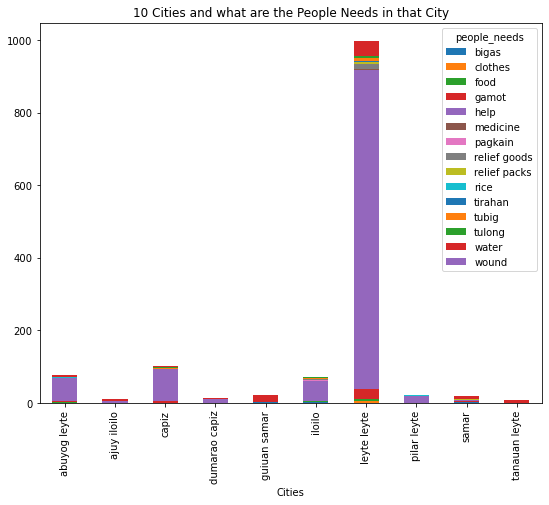

In [137]:
import numpy as np 
import matplotlib.pyplot as plt 

cities = ['abuyog leyte', 'capiz', 'dumarao capiz', 'iloilo', 'ajuy iloilo', 
          'leyte leyte', 'pilar leyte', 'tanauan leyte', 'samar', 'guiuan samar']

location = df[df["loc_name"].isin(cities)]
df_loc = location
df_loc["loc_name"].unique()

s = df_loc.groupby(['loc_name','people_needs']).size().unstack()
s.plot(kind='bar', stacked=True,figsize=(9, 7))

plt.title("10 Cities and what are the People Needs in that City")
plt.xlabel("Cities")

In [138]:
df
location_goods_df = df[['coords','category']]
location_goods_df.to_csv('Datasets/category_coords.csv', index = False)
location_goods_df

,coords,category
0,124.552177/11.33877,Medical Response
2,124.552177/11.33877,Medical Response
3,124.552177/11.33877,Medical Response
4,124.552177/11.33877,Food & Clothes
5,122.650482/10.84919,Food & Clothes
...,...,...
2589,14.5438774/120.9416422,Medical Response
2591,10.5470262/124.7434968,Medical Response
2599,10.3360323/124.7224949,Food & Clothes
2601,11.1808072/124.8960325,Food & Clothes
